In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import stats

read data collected tron NI labview

In [2]:
df = pd.read_csv('helium3.csv')

In [3]:
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Average
0,88971,0.115846,0.117186,0.115176,0.115846,0.115511,0.115176,0.114841,0.115846,0.114841,0.115511,0.115578
1,88972,0.113835,0.115511,0.114841,0.116516,0.116181,0.112495,0.115176,0.117521,0.114841,0.111825,0.114874
2,88973,0.114841,0.115176,0.116516,0.114506,0.114841,0.112830,0.116516,0.114506,0.115511,0.114506,0.114975
3,88974,0.116181,0.117521,0.109144,0.115846,0.115176,0.113165,0.113500,0.113500,0.115511,0.116851,0.114639
4,88975,0.114171,0.115511,0.115511,0.115846,0.115846,0.115511,0.115846,0.114171,0.110820,0.116181,0.114941
...,...,...,...,...,...,...,...,...,...,...,...,...
10026,98997,0.114506,0.115846,0.115176,0.116851,0.116516,0.114506,0.116181,0.115176,0.115846,0.115846,0.115645
10027,98998,0.115511,0.117186,0.116181,0.111490,0.115176,0.115176,0.116181,0.116181,0.113835,0.112160,0.114908
10028,98999,0.113835,0.110485,0.114841,0.115511,0.114506,0.112160,0.114506,0.115176,0.114506,0.116516,0.114204
10029,99000,0.114171,0.112830,0.114506,0.114841,0.115176,0.115176,0.106128,0.116516,0.114506,0.118191,0.114204


In [4]:
# relabel data columns
for i in range(0,12):
    if i == 0:
        df.rename(columns = {i:'Wavenumber'}, inplace = True)
    else:
        df.rename(columns = {i:'Sample'+str(i)}, inplace = True)

In [5]:
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Average
0,88971,0.115846,0.117186,0.115176,0.115846,0.115511,0.115176,0.114841,0.115846,0.114841,0.115511,0.115578
1,88972,0.113835,0.115511,0.114841,0.116516,0.116181,0.112495,0.115176,0.117521,0.114841,0.111825,0.114874
2,88973,0.114841,0.115176,0.116516,0.114506,0.114841,0.112830,0.116516,0.114506,0.115511,0.114506,0.114975
3,88974,0.116181,0.117521,0.109144,0.115846,0.115176,0.113165,0.113500,0.113500,0.115511,0.116851,0.114639
4,88975,0.114171,0.115511,0.115511,0.115846,0.115846,0.115511,0.115846,0.114171,0.110820,0.116181,0.114941
...,...,...,...,...,...,...,...,...,...,...,...,...
10026,98997,0.114506,0.115846,0.115176,0.116851,0.116516,0.114506,0.116181,0.115176,0.115846,0.115846,0.115645
10027,98998,0.115511,0.117186,0.116181,0.111490,0.115176,0.115176,0.116181,0.116181,0.113835,0.112160,0.114908
10028,98999,0.113835,0.110485,0.114841,0.115511,0.114506,0.112160,0.114506,0.115176,0.114506,0.116516,0.114204
10029,99000,0.114171,0.112830,0.114506,0.114841,0.115176,0.115176,0.106128,0.116516,0.114506,0.118191,0.114204


No handles with labels found to put in legend.


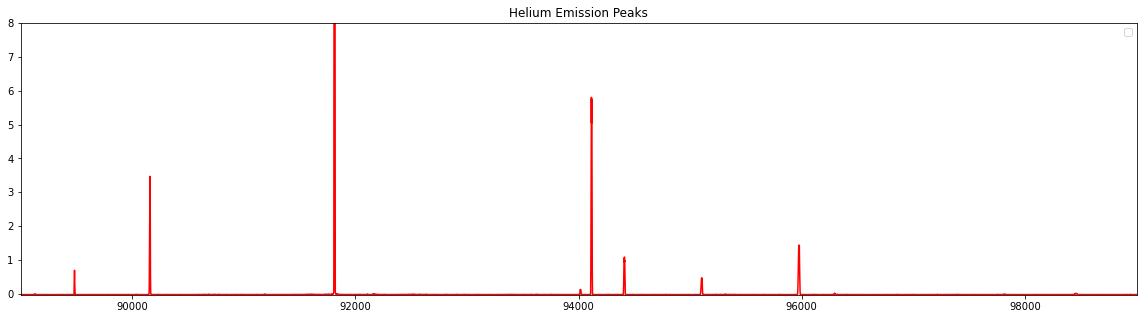

In [6]:
# plot wavenumber by voltage
plt.figure(figsize=(20,5))
plt.title("Helium Emission Peaks")
plt.plot(df.Column1,-df.Average-(-df.Average).mean(), color='r')
# plt.yscale("symlog")
plt.ylim(-.03,8) # largest magnitude, lowest magnitude

plt.xlim(89000,99000)
plt.legend()

In [7]:
# get wavenumber for spesific voltage
def get_wn(dataframe, val):
    array = dataframe.query(f'Average == {val}')
    return array

In [8]:
# getting the largest magnitude value wavenumber
lm_val= df.Average.min()
get_wn(df, lm_val)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Average
2842,91813,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2844,91815,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2845,91816,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469


In [9]:
# getting the smallest magnitude value wavenumber
sm_val= df.Average.max()
get_wn(df, sm_val)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Average
8042,97013,0.115511,0.117856,0.116181,0.117186,0.115511,0.116851,0.115846,0.117856,0.116516,0.116516,0.116583


In [10]:
x =-df.Average-(-df.Average).mean()

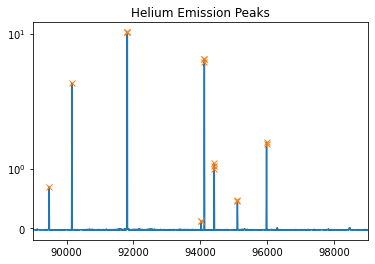

In [11]:
peaks, f = find_peaks(x, height=0.05)
plt.title("Helium Emission Peaks")
plt.plot(df.Column1, x)
plt.plot(peaks+df.Column1.min(), x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.yscale('symlog')
plt.xlim(89000,99000)
# plt.ylim(0.01,.5)
plt.show()

In [12]:
f

{'peak_heights': array([ 0.69426263,  3.47004183, 10.28363623, 10.29995473, 10.29995473,
         0.11756783,  0.12723433,  5.80342623,  5.76336713,  5.41802513,
         1.04013103,  1.08656043,  0.99487533,  0.47207283,  0.45195403,
         1.44055563,  1.41674593])}

In [13]:
peak_data= {}
a = []
l = []
for p in peaks:
    if x[p] >df.Average.mean():
        a.append(p+df.Column1.min())
        l.append(x[p])
peak_data['Wavenumber'] = a
peak_data['Voltage'] = l
df2 = pd.DataFrame(peak_data)

In [14]:
df2

,Wavenumber,Voltage
0,89483,0.694263
1,90160,3.470042
2,91810,10.283636
3,91813,10.299955
4,91815,10.299955
5,94015,0.117568
6,94018,0.127234
7,94115,5.803426
8,94117,5.763367
9,94119,5.418025


In [15]:
he = pd.read_csv('clean_helium_data - Sheet1.csv')
he.head()

,Wavenumber,Intensity
0,41921.69028,7
1,39821.59924,9
2,36721.63896,1
3,36585.81202,12
4,36182.06817,2


No handles with labels found to put in legend.


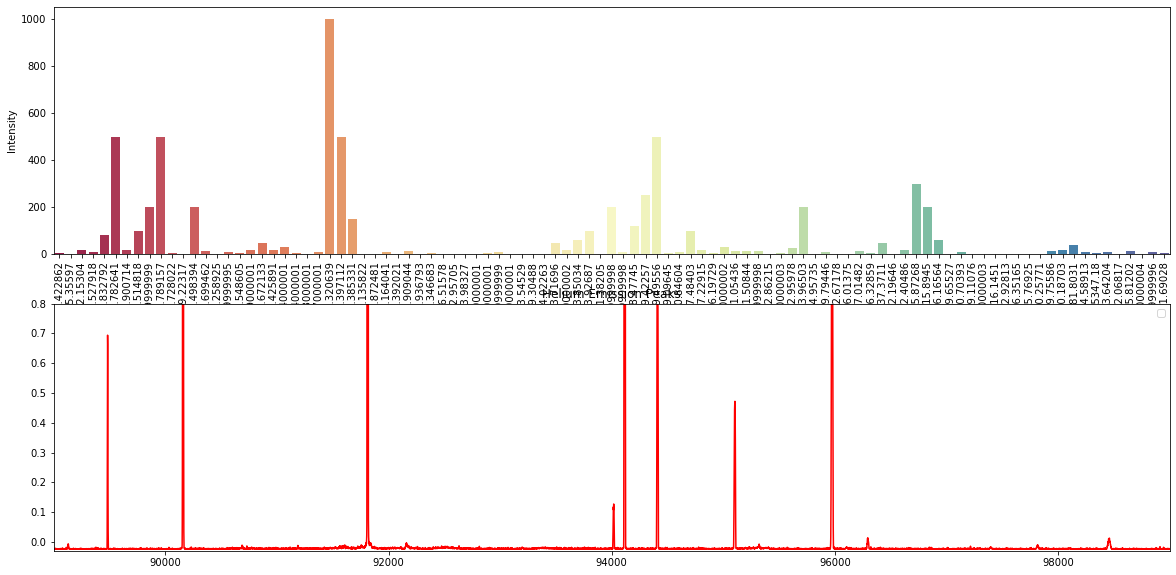

In [16]:
# plot wavenumber by voltage
plt.figure(figsize=(20,10))

plt.subplot(211)
# sns.barplot(x='Wavenumber',y='Intensity', data=he)
barplot = sns.barplot(x='Wavenumber'
                      ,y='Intensity'
                      ,data=he
                      ,ci=None
                      ,palette = 'Spectral'
                      )
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, fontsize=10)
barplot.figure


plt.subplot(212)
plt.title("Helium Emission Peaks")
plt.plot(df.Column1,-df.Average-(-df.Average).mean(), color='r')
# plt.yscale("symlog")
plt.ylim(-.03,0.8) # largest magnitude, lowest magnitude

plt.xlim(89000,99000)
plt.legend()

In [17]:
measured = [89483, 90160, 91813, 94115, 94411,95104,95975]
physical = [4858.782641, 5351.789157,9233.320638, 17019.08556, 19937.4803 ,22363.96503, 95714.87268 ]

In [18]:
# m, b, r_value, p_value, std_err = stats.linregress(measured, physical)
# m, b, r_value, p_value, std_err

From here we guess as to the actual 

In [19]:
guess = pd.read_csv('guess2.txt', delimiter='\t')
guess.head()

,wavenumber,actual
0,89483,14149.99000
1,90159,14974.20312
2,91813,17019.42257
3,94018,19810.84604
4,94115,19937.48403


In [20]:
np.polyfit(guess.wavenumber,guess.actual,1)

array([ 1.26224047e+00, -9.88346515e+04])

In [21]:
m, b, r_value, p_value, std_err = stats.linregress(guess.wavenumber, guess.actual)
m, b, r_value, p_value, std_err

(1.2622404665723173,
 -98834.65147159612,
 0.999941328421356,
 5.048986610814416e-13,
 0.005582316679307243)

In [22]:
# def make_into_measured_wn(wn, m, b):
#     return (wn-b)/m

In [23]:
def make_into_measured_wn(array, dataframe):
    results = np.polyfit(dataframe.wavenumber,dataframe.actual,2)
#     m2 = results[0]
# #     m1 = results[1]
#     b = results[1]
    return m*array +b

In [24]:
make_into_measured_wn(he.Wavenumber,guess)

0    -45919.397573
1    -48570.217467
2    -52483.112777
3    -52654.559038
4    -53164.180863
          ...     
94   -92858.153919
95   -92858.538743
96   -92861.536410
97   -94750.854242
98   -95716.383766
Name: Wavenumber, Length: 99, dtype: float64

No handles with labels found to put in legend.


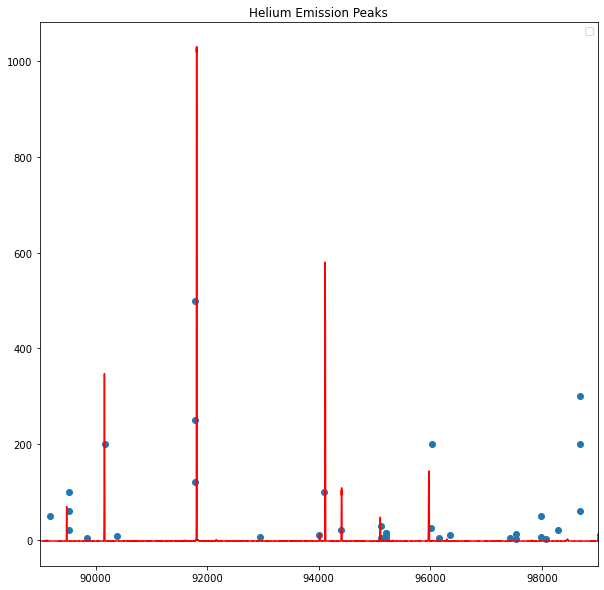

In [25]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))

plt.scatter((he.Wavenumber+98835)/1.2622, he.Intensity)
plt.xlim(89000,99000)

plt.title("Helium Emission Peaks")
plt.plot(df.Column1,(-df.Average-(-df.Average).mean())*100, color='r')
# plt.yscale("symlog")
# plt.ylim(-.03,0.8) # largest magnitude, lowest magnitude

plt.xlim(89000,99000)
plt.legend()

No handles with labels found to put in legend.


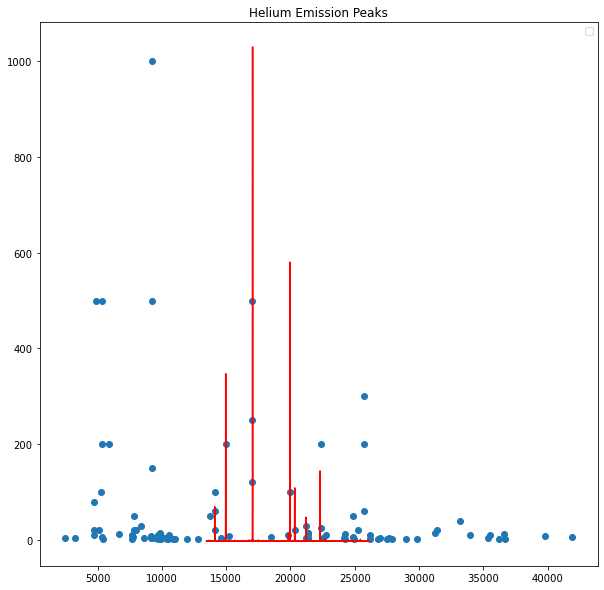

In [26]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))

plt.scatter(he.Wavenumber, he.Intensity)


plt.title("Helium Emission Peaks")
plt.plot(df.Column1*1.2622-98835,(-df.Average-(-df.Average).mean())*100, color='r')
# plt.yscale("symlog")
# plt.ylim(-.03,0.8) # largest magnitude, lowest magnitude


plt.legend()

(89000.0, 96250.0)

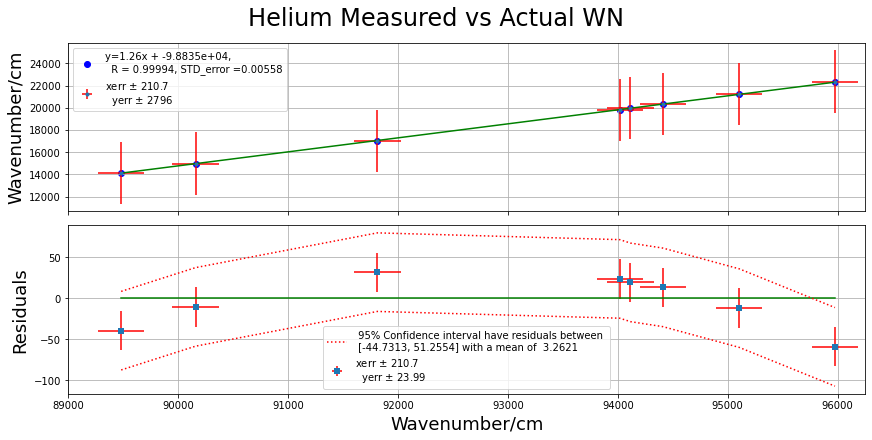

In [118]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6),  constrained_layout=True)

fig.suptitle("Helium Measured vs Actual WN", fontsize=24)

y =  (guess.wavenumber*1.2622-98835)
diff = y- guess.actual
axs[0].scatter(guess.wavenumber, guess.actual, color='b',  label="y={0:.3}x + {1:.4e}, \n  R = {2:.5f}, STD_error ={3:.5f}".format(m,b,r_value, std_err))
axs[0].errorbar(guess.wavenumber, guess.actual, 
             xerr = 210.72794551310258,  
             yerr = 2796.11179  ,  
             fmt ='.',
             ecolor='r',
             label="xerr $\pm$ 210.7 \n  yerr $\pm$ 2796 ")

axs[0].grid(True)
axs[0].set_ylabel("Wavenumber/cm",fontsize=18)
axs[0].legend(prop={'size': 10})

axs[0].plot( guess.wavenumber, y, color='g', label=" 1000 V with Lock-in Amp \n low delay")
# axs[1].set_ylim(y.min(),0.8) # largest magnitude, lowest magnitude
# axs[1].set_xlim(91000,96000)
axs[1].errorbar(guess.wavenumber, diff,
            xerr = 210.72794551310258,  
             yerr =23.99666   ,  
             fmt ='o',
               ecolor='r',
                marker='s', mfc='blue', ms=2, mew=4,
                label="xerr $\pm$ 210.7 \n  yerr $\pm$ 23.99 ")
axs[1].plot(guess.wavenumber, guess.actual*0, color='g')
axs[1].plot(guess.wavenumber, diff +47.9933,color='r',linestyle=':', label =" 95% Confidence interval have residuals between \n [-44.7313, 51.2554] with a mean of  3.2621 ")
axs[1].plot(guess.wavenumber, diff -47.9933,color='r',linestyle=':')
#c axs[1].ylabel('Residuals',fontsize=12)
# axs[1].xlabel('$\phi$ in degrees $\degree$',fontsize=12)
axs[1].grid(True)
axs[1].set_xlabel("Wavenumber/cm",fontsize=18)
axs[1].set_ylabel("Residuals",fontsize=18)
axs[1].legend(prop={'size': 10})
axs[1].set_xlim(89000,96250)


In [39]:
(guess.wavenumber*m+b)/ guess.actual

0   -5.722545
1   -5.338087
2   -4.544928
3   -3.726676
4   -3.694987
5   -3.602333
6   -3.395981
7   -3.157130
Name: actual, dtype: float64

In [40]:


def mean_stu_conf(array):
    mean = np.average(array)
    N =len(array)
    stu = np.std(array)/(N**0.5)
    i = mean -2*stu
    f = mean +2*stu
    s = 2*stu
    A = np.around(np.arange(i,f,.00001),5)
    results =  " Mean= {0:.4f} \n Standard uncertainty= {1:.5f} \n Confidence Interval = [{2:.4f}, {3:.4f}] \n x +- 2*stu          = {0:.4f} +- {4:.4f}".format(mean,stu,i,f,s)
    print(results)
    print(" STD = {0:.4f}".format(np.std(array)))
    a = "Yes" if 1 in A else "No"
    print("\n Is conserved: "+a)
    print(" \n ")
    


In [37]:
a = (guess.wavenumber*m+b)/ guess.actual
mean_stu_conf([a])

 Mean= 1.0000 
 Standard uncertainty= 0.00163 
 Confidence Interval = [0.9967, 1.0032] 
 x +- 2*stu          = 1.0000 +- 0.0033
 STD = 0.0016

 Is conserved: Yes
 
 


In [41]:
a =guess.wavenumber
mean_stu_conf([a])

 Mean= 93134.7500 
 Standard uncertainty= 2215.06742 
 Confidence Interval = [88704.6152, 97564.8848] 
 x +- 2*stu          = 93134.7500 +- 4430.1348
 STD = 2215.0674

 Is conserved: No
 
 


In [42]:
a =guess.actual
mean_stu_conf([a])

 Mean= 18723.7988 
 Standard uncertainty= 2796.11179 
 Confidence Interval = [13131.5752, 24316.0224] 
 x +- 2*stu          = 18723.7988 +- 5592.2236
 STD = 2796.1118

 Is conserved: No
 
 


In [66]:

a= (guess.actual+98835)/1.2622 -guess.wavenumber
mean_stu_conf([a])

 Mean= 3.2621 
 Standard uncertainty= 23.99666 
 Confidence Interval = [-44.7313, 51.2554] 
 x +- 2*stu          = 3.2621 +- 47.9933
 STD = 23.9967

 Is conserved: Yes
 
 


In [47]:
2796.11179/18723.7988 *(13131.5752- 24316.0224)

-1670.2254181748895

In [55]:
2215.06742/93134.7500 *(97564.8848-88704.6152)

210.72794551310258

In [63]:
2215.06742 /93134.7500

0.023783468791186962

In [ ]:
93134.7500

In [119]:
np.polyfit(guess.wavenumber,guess.actual,2)

array([ 8.39965905e-06, -2.93137187e-01, -2.68754841e+04])

In [126]:
x=  guess.wavenumber
y = 8.39965905e-06*x**2 -2.93137187e-01*x -2.68754841e+04
diff = y- guess.actual

mean_stu_conf([y]),mean_stu_conf([diff])


 Mean= 18723.7989 
 Standard uncertainty= 2796.11126 
 Confidence Interval = [13131.5764, 24316.0214] 
 x +- 2*stu          = 18723.7989 +- 5592.2225
 STD = 2796.1113

 Is conserved: No
 
 
 Mean= 0.0001 
 Standard uncertainty= 1.72872 
 Confidence Interval = [-3.4574, 3.4575] 
 x +- 2*stu          = 0.0001 +- 3.4574
 STD = 1.7287

 Is conserved: Yes
 
 


(None, None)

(89000.0, 96250.0)

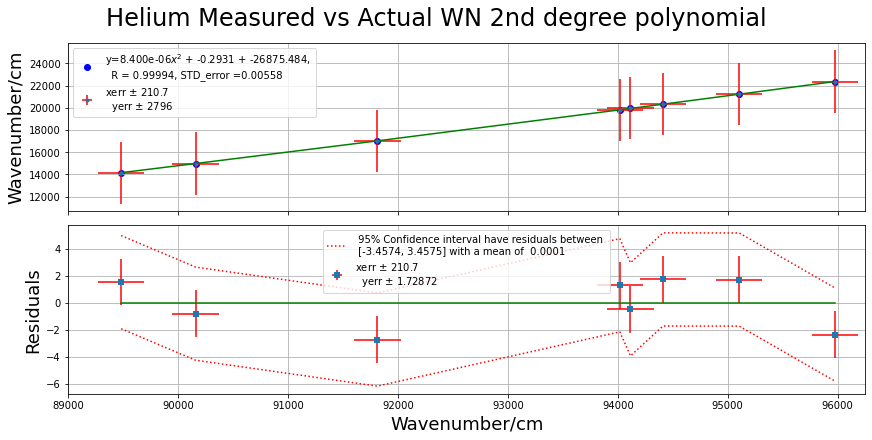

In [127]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6),  constrained_layout=True)

fig.suptitle("Helium Measured vs Actual WN 2nd degree polynomial", fontsize=24)
x=  guess.wavenumber
y = 8.39965905e-06*x**2 -2.93137187e-01*x -2.68754841e+04
diff = y- guess.actual
axs[0].scatter(x, guess.actual, color='b',  label="y={0:.3e}$x^2$ + {1:.4} + {2:.3f}, \n  R = {3:.5}, STD_error ={4:.5f}".format(8.39965905e-06,-2.93137187e-01,-2.68754841e+04,r_value, std_err))
axs[0].errorbar(x, guess.actual, 
             xerr = 210.72794551310258,  
             yerr = 2796.11179  ,  
             fmt ='.',
             ecolor='r',
             label="xerr $\pm$ 210.7 \n  yerr $\pm$ 2796 ")

axs[0].grid(True)
axs[0].set_ylabel("Wavenumber/cm",fontsize=18)
axs[0].legend(prop={'size': 10})

axs[0].plot(x, y, color='g', label=" 1000 V with Lock-in Amp \n low delay")
# axs[1].set_ylim(y.min(),0.8) # largest magnitude, lowest magnitude
# axs[1].set_xlim(91000,96000)
axs[1].errorbar(x, diff,
            xerr = 210.72794551310258,  
             yerr =1.72872   ,  
             fmt ='o',
               ecolor='r',
                marker='s', mfc='blue', ms=2, mew=4,
                label="xerr $\pm$ 210.7 \n  yerr $\pm$ 1.72872 ")
axs[1].plot(x, guess.actual*0, color='g')
axs[1].plot(x, diff +3.4574,color='r',linestyle=':', label =" 95% Confidence interval have residuals between \n [-3.4574, 3.4575] with a mean of  0.0001 ")
axs[1].plot(x, diff -3.4574,color='r',linestyle=':')
#c axs[1].ylabel('Residuals',fontsize=12)
# axs[1].xlabel('$\phi$ in degrees $\degree$',fontsize=12)
axs[1].grid(True)
axs[1].set_xlabel("Wavenumber/cm",fontsize=18)
axs[1].set_ylabel("Residuals",fontsize=18)
axs[1].legend(prop={'size': 10})
axs[1].set_xlim(89000,96250)
